# **K-Means Clustering**

## Pengumpulan Data

### Koneksi dengan Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Library dan Dataset

In [ ]:
import pandas as pd
import numpy as np
import os
import glob

In [ ]:
#Pilih direktori Tokped
os.chdir("/content/drive/My Drive/Dataset/Laptop_Price_List_Tokopedia/Tokped")

## Pra Pemrosesan Data

### Import Dataset

In [ ]:
df = pd.read_csv('tokped_clean_data5.csv')
df

,name,price,location,sold,date,type,merk,prosesor,memory_size,disk_size
0,Laptop Acer Aspire 3 Celeron N4120 256GB SSD 4...,4499000,Jakarta Barat,1,2020-10-02,Aspire,Acer,Intel Celeron,6 GB,256 GB
1,LAPTOP ACER ASPIRE 3 A314-21 A4 9120e RAM 4GB ...,3883450,Surabaya,3,2020-10-02,Aspire,Acer,AMD A4,4 GB,1 TB
2,Acer Aspire 3 A314 A4 9120 4GB 1TB W10 14.0 DV...,3599000,Jakarta Pusat,2,2020-10-02,Aspire,Acer,AMD A4,4 GB,1 TB
3,PC All In One acer Aspire C24-960 8GB 1TB Core...,7499900,Jakarta Pusat,3,2020-10-02,Aspire,Acer,Intel Core i3,8 GB,1 TB
4,Laptop Acer Aspire 3 - A314-32 - INTEL N4000 D...,3799000,Jakarta Pusat,118,2020-10-02,Aspire,Acer,Intel Celeron,4 GB,1 TB
...,...,...,...,...,...,...,...,...,...,...
119054,ASUS VIVOBOOK FLIP TM420IA RYZEN 5-4500U 8GB 5...,11999000,Jakarta Barat,1,2021-01-26,Vivobook,Asus,AMD Ryzen 5,12 GB,512 GB
119055,Laptop Asus Vivobook K413FQ i5 8gb 512Gb 14fhd...,12400000,Jakarta Utara,2,2021-01-26,Vivobook,Asus,Intel Core i5,12 GB,512 GB
119056,Asus vivobook A416ma intel N4020 4gb 256gb 14 ...,5799000,Bandung,1,2021-01-26,Vivobook,Asus,Intel Celeron,6 GB,256 GB
119057,ASUS VIVOBOOK A407UF I5 8250U 4GB 256GB MX130 ...,9800000,Kab. Bekasi,7,2021-01-26,Vivobook,Asus,Intel Core i5,6 GB,256 GB


In [ ]:
df.shape

(119059, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119059 entries, 0 to 119058
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   name         119059 non-null  object
 1   price        119059 non-null  int64 
 2   location     119059 non-null  object
 3   sold         119059 non-null  int64 
 4   date         119059 non-null  object
 5   type         119059 non-null  object
 6   merk         119059 non-null  object
 7   prosesor     119059 non-null  object
 8   memory_size  119059 non-null  object
 9   disk_size    119059 non-null  object
dtypes: int64(2), object(8)
memory usage: 9.1+ MB


In [ ]:
# Memeriksa value unik dari setiap kolom
df.nunique()

name           7926
price          2968
location         66
sold            230
date             39
type             49
merk             13
prosesor         25
memory_size       8
disk_size        12
dtype: int64

In [ ]:
tokped = df.drop(['name'], axis=1)
tokped

,price,location,sold,date,type,merk,prosesor,memory_size,disk_size
0,4499000,Jakarta Barat,1,2020-10-02,Aspire,Acer,Intel Celeron,6 GB,256 GB
1,3883450,Surabaya,3,2020-10-02,Aspire,Acer,AMD A4,4 GB,1 TB
2,3599000,Jakarta Pusat,2,2020-10-02,Aspire,Acer,AMD A4,4 GB,1 TB
3,7499900,Jakarta Pusat,3,2020-10-02,Aspire,Acer,Intel Core i3,8 GB,1 TB
4,3799000,Jakarta Pusat,118,2020-10-02,Aspire,Acer,Intel Celeron,4 GB,1 TB
...,...,...,...,...,...,...,...,...,...
119054,11999000,Jakarta Barat,1,2021-01-26,Vivobook,Asus,AMD Ryzen 5,12 GB,512 GB
119055,12400000,Jakarta Utara,2,2021-01-26,Vivobook,Asus,Intel Core i5,12 GB,512 GB
119056,5799000,Bandung,1,2021-01-26,Vivobook,Asus,Intel Celeron,6 GB,256 GB
119057,9800000,Kab. Bekasi,7,2021-01-26,Vivobook,Asus,Intel Core i5,6 GB,256 GB


In [ ]:
tokped2 = tokped.drop(['date'], axis=1)
tokped2

,price,location,sold,type,merk,prosesor,memory_size,disk_size
0,4499000,Jakarta Barat,1,Aspire,Acer,Intel Celeron,6 GB,256 GB
1,3883450,Surabaya,3,Aspire,Acer,AMD A4,4 GB,1 TB
2,3599000,Jakarta Pusat,2,Aspire,Acer,AMD A4,4 GB,1 TB
3,7499900,Jakarta Pusat,3,Aspire,Acer,Intel Core i3,8 GB,1 TB
4,3799000,Jakarta Pusat,118,Aspire,Acer,Intel Celeron,4 GB,1 TB
...,...,...,...,...,...,...,...,...
119054,11999000,Jakarta Barat,1,Vivobook,Asus,AMD Ryzen 5,12 GB,512 GB
119055,12400000,Jakarta Utara,2,Vivobook,Asus,Intel Core i5,12 GB,512 GB
119056,5799000,Bandung,1,Vivobook,Asus,Intel Celeron,6 GB,256 GB
119057,9800000,Kab. Bekasi,7,Vivobook,Asus,Intel Core i5,6 GB,256 GB


In [ ]:
# Melihat nilai unik apa saja yang ada pada kolom memory size
tokped['memory_size'].unique()

array(['6 GB', '4 GB', '8 GB', '12 GB', '16 GB', '2 GB', '32 GB', '20 GB'],
      dtype=object)

In [ ]:
# Melihat nilai unik apa saja yang ada pada kolom disk size
tokped['disk_size'].unique()

array(['256 GB', '1 TB', '512 GB', '500 GB', '128 GB', '2 TB', '240 GB',
       '320 GB', '120 GB', '250 GB', '750 GB', '180 GB'], dtype=object)

In [ ]:
# Melihat nilai unik apa saja yang ada pada kolom disk size
tokped['disk_size'].unique()

array(['256 GB', '1 TB', '512 GB', '500 GB', '128 GB', '2 TB', '240 GB',
       '320 GB', '120 GB', '250 GB', '750 GB', '180 GB'], dtype=object)

## Label Encoding

### Konversi dan Encoding Kolom

Konversi kolom menjadi tipe data kategori terlebih dahulu. Lalu lakukan label encoding pada kolom yang sudah diubah menjadi tipe data kategori

In [ ]:
# Untuk melihat dan menyimpan nilai asli dari setiap data yang sudah dikategorikan
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#### Kolom `location`

In [ ]:
tokped2["location"] = tokped2["location"].astype('category')

In [ ]:
le.fit(tokped['location'])
le_location = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_location)

{'Balikpapan': 0, 'Bandar Lampung': 1, 'Bandung': 2, 'Banjarmasin': 3, 'Batam': 4, 'Bekasi': 5, 'Bengkulu': 6, 'Binjai': 7, 'Blitar': 8, 'Bogor': 9, 'Denpasar': 10, 'Depok': 11, 'Jakarta Barat': 12, 'Jakarta Pusat': 13, 'Jakarta Selatan': 14, 'Jakarta Timur': 15, 'Jakarta Utara': 16, 'Jambi': 17, 'Kab. Bandung': 18, 'Kab. Bandung Barat': 19, 'Kab. Bangka': 20, 'Kab. Banyumas': 21, 'Kab. Banyuwangi': 22, 'Kab. Batang': 23, 'Kab. Bekasi': 24, 'Kab. Bogor': 25, 'Kab. Deli Serdang': 26, 'Kab. Gianyar': 27, 'Kab. Jember': 28, 'Kab. Karawang': 29, 'Kab. Kediri': 30, 'Kab. Kendal': 31, 'Kab. Kotabaru': 32, 'Kab. Lebak': 33, 'Kab. Malang': 34, 'Kab. Pasuruan': 35, 'Kab. Pati': 36, 'Kab. Pekalongan': 37, 'Kab. Purworejo': 38, 'Kab. Sidoarjo': 39, 'Kab. Sleman': 40, 'Kab. Tangerang': 41, 'Kediri': 42, 'Magelang': 43, 'Makassar': 44, 'Malang': 45, 'Manado': 46, 'Mataram': 47, 'Medan': 48, 'Mojokerto': 49, 'Padang': 50, 'Palembang': 51, 'Pasuruan': 52, 'Pekanbaru': 53, 'Pontianak': 54, 'Salatiga':

In [ ]:
tokped2["location_cat"] = tokped2["location"].cat.codes

#### Kolom `sold`

In [ ]:
tokped2["sold"] = tokped2["sold"].astype('category')

In [ ]:
le.fit(tokped['sold'])
le_sold = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_sold)

{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 29: 28, 30: 29, 31: 30, 32: 31, 33: 32, 34: 33, 35: 34, 36: 35, 37: 36, 38: 37, 39: 38, 40: 39, 41: 40, 42: 41, 43: 42, 44: 43, 45: 44, 46: 45, 47: 46, 48: 47, 49: 48, 50: 49, 51: 50, 52: 51, 53: 52, 54: 53, 55: 54, 56: 55, 57: 56, 58: 57, 59: 58, 60: 59, 61: 60, 62: 61, 63: 62, 64: 63, 65: 64, 66: 65, 68: 66, 69: 67, 70: 68, 71: 69, 72: 70, 73: 71, 74: 72, 75: 73, 76: 74, 77: 75, 78: 76, 79: 77, 80: 78, 81: 79, 82: 80, 83: 81, 84: 82, 85: 83, 86: 84, 87: 85, 88: 86, 89: 87, 90: 88, 91: 89, 92: 90, 93: 91, 94: 92, 95: 93, 96: 94, 97: 95, 98: 96, 99: 97, 100: 98, 101: 99, 102: 100, 103: 101, 104: 102, 105: 103, 106: 104, 108: 105, 109: 106, 112: 107, 114: 108, 115: 109, 116: 110, 117: 111, 118: 112, 119: 113, 120: 114, 121: 115, 122: 116, 123: 117, 124: 118, 125: 119, 126: 120, 127: 1

In [ ]:
tokped2["sold_cat"] = tokped2["sold"].cat.codes

#### Kolom `type`

In [ ]:
tokped2["type"] = tokped2["type"].astype('category')

In [ ]:
le.fit(tokped['type'])
le_type = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_type)

{'11': 0, '14': 1, '15': 2, '240': 3, '245': 4, 'Alpha': 5, 'Aspire': 6, 'Blade': 7, 'Bravo': 8, 'Dynabook': 9, 'Elitebook': 10, 'Envy': 11, 'G5': 12, 'GF63': 13, 'GF65': 14, 'GL65': 15, 'GPD Win': 16, 'Ideapad': 17, 'Inspiron': 18, 'Latitude': 19, 'Legion': 20, 'Lifebook': 21, 'Macbook Air': 22, 'Macbook Pro': 23, 'Matebook': 24, 'Mi Gaming': 25, 'Modern': 26, 'Nitro': 27, 'Omen': 28, 'Pavilion': 29, 'Portege': 30, 'Precision': 31, 'Predator': 32, 'Prestige': 33, 'Probook': 34, 'ROG': 35, 'Spectre': 36, 'Swift': 37, 'TUF': 38, 'Thinkbook': 39, 'Thinkpad': 40, 'TravelMate': 41, 'V14': 42, 'V15': 43, 'Vivobook': 44, 'Vostro': 45, 'XPS': 46, 'Yoga': 47, 'Zenbook': 48}


In [ ]:
tokped2["type_cat"] = tokped2["type"].cat.codes

#### Kolom `merk`

In [ ]:
tokped2["merk"] = tokped2["merk"].astype('category')

In [ ]:
le.fit(tokped['merk'])
le_merk = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_merk)

{'Acer': 0, 'Apple': 1, 'Asus': 2, 'Dell': 3, 'Fujitsu': 4, 'GPD': 5, 'HP': 6, 'Huawei': 7, 'Lenovo': 8, 'MSI': 9, 'Razer': 10, 'Toshiba': 11, 'Xiaomi': 12}


In [ ]:
tokped2["merk_cat"] = tokped2["merk"].cat.codes

#### Kolom `prosesor`

In [ ]:
tokped2["prosesor"] = tokped2["prosesor"].astype('category')

In [ ]:
le.fit(tokped['prosesor'])
le_prosesor = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_prosesor)

{'AMD 3020': 0, 'AMD 3050': 1, 'AMD A10': 2, 'AMD A12': 3, 'AMD A4': 4, 'AMD A6': 5, 'AMD A8': 6, 'AMD A9': 7, 'AMD E2': 8, 'AMD Ryzen 3': 9, 'AMD Ryzen 5': 10, 'AMD Ryzen 7': 11, 'AMD Ryzen 9': 12, 'Intel Athlon': 13, 'Intel Celeron': 14, 'Intel Core M3': 15, 'Intel Core M5': 16, 'Intel Core i3': 17, 'Intel Core i5': 18, 'Intel Core i7': 19, 'Intel Core i9': 20, 'Intel Dual Core': 21, 'Intel Pentium Gold': 22, 'Intel Pentium Silver': 23, 'Intel Quad Core': 24}


In [ ]:
tokped2["prosesor_cat"] = tokped2["prosesor"].cat.codes

#### Kolom `memory_size`

In [ ]:
tokped2["memory_size"] = tokped2["memory_size"].astype('category')

In [ ]:
tokped2['mem_size_cat'] = tokped2['memory_size'].map({'2 GB': 0, '4 GB': 1, '6 GB': 2, '8 GB': 3, '12 GB': 4, '16 GB': 5, '20 GB': 6, '32 GB':7})

#### Kolom `disk_size`

In [ ]:
tokped2["disk_size"] = tokped2["disk_size"].astype('category')

In [ ]:
tokped2['disk_size_cat'] = tokped2['disk_size'].map({'120 GB': 0, '128 TB': 1, '180 GB': 2, '240 GB': 3, '250 GB': 4, '256 GB': 5, '320 TB': 6, '500 GB': 7,
       '512 GB': 8, '750 GB': 9, '1 TB': 10, '2 TB': 11})

### Buang kolom yang tidak perlu

In [ ]:
tokped2

,price,location,sold,type,merk,prosesor,memory_size,disk_size,location_cat,sold_cat,type_cat,merk_cat,prosesor_cat,mem_size_cat,disk_size_cat
0,4499000,Jakarta Barat,1,Aspire,Acer,Intel Celeron,6 GB,256 GB,12,0,6,0,14,2,5.0
1,3883450,Surabaya,3,Aspire,Acer,AMD A4,4 GB,1 TB,60,2,6,0,4,1,10.0
2,3599000,Jakarta Pusat,2,Aspire,Acer,AMD A4,4 GB,1 TB,13,1,6,0,4,1,10.0
3,7499900,Jakarta Pusat,3,Aspire,Acer,Intel Core i3,8 GB,1 TB,13,2,6,0,17,3,10.0
4,3799000,Jakarta Pusat,118,Aspire,Acer,Intel Celeron,4 GB,1 TB,13,112,6,0,14,1,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119054,11999000,Jakarta Barat,1,Vivobook,Asus,AMD Ryzen 5,12 GB,512 GB,12,0,44,2,10,4,8.0
119055,12400000,Jakarta Utara,2,Vivobook,Asus,Intel Core i5,12 GB,512 GB,16,1,44,2,18,4,8.0
119056,5799000,Bandung,1,Vivobook,Asus,Intel Celeron,6 GB,256 GB,2,0,44,2,14,2,5.0
119057,9800000,Kab. Bekasi,7,Vivobook,Asus,Intel Core i5,6 GB,256 GB,24,6,44,2,18,2,5.0


Membuang kolom-kolom yang tidak dilabel encoding

In [ ]:
tokped3 = tokped2.drop(['location','sold','type','merk','prosesor','memory_size','disk_size'], axis=1)
tokped3

,price,location_cat,sold_cat,type_cat,merk_cat,prosesor_cat,mem_size_cat,disk_size_cat
0,4499000,12,0,6,0,14,2,5.0
1,3883450,60,2,6,0,4,1,10.0
2,3599000,13,1,6,0,4,1,10.0
3,7499900,13,2,6,0,17,3,10.0
4,3799000,13,112,6,0,14,1,10.0
...,...,...,...,...,...,...,...,...
119054,11999000,12,0,44,2,10,4,8.0
119055,12400000,16,1,44,2,18,4,8.0
119056,5799000,2,0,44,2,14,2,5.0
119057,9800000,24,6,44,2,18,2,5.0


In [ ]:
#tokped3['disk_size_cat'] = tokped3['disk_size_cat'].astype(int)
tokped3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119059 entries, 0 to 119058
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   price          119059 non-null  int64   
 1   location_cat   119059 non-null  int8    
 2   sold_cat       119059 non-null  int16   
 3   type_cat       119059 non-null  int8    
 4   merk_cat       119059 non-null  int8    
 5   prosesor_cat   119059 non-null  int8    
 6   mem_size_cat   119059 non-null  category
 7   disk_size_cat  117767 non-null  float64 
dtypes: category(1), float64(1), int16(1), int64(1), int8(4)
memory usage: 2.6 MB


Ada value yang null atau nan pada kolom `disk_size_cat`. Perlu direplace dengan nilai lain agar bisa diubah menjadi integer.

In [ ]:
tokped3['disk_size_cat'].isnull().values.any()

True

In [ ]:
tokped3['disk_size_cat'].isnull().sum()

1292

In [ ]:
tokped3['disk_size_cat'] = tokped3['disk_size_cat'].fillna(12)

In [ ]:
tokped3['disk_size_cat'] = tokped3['disk_size_cat'].astype(int)

In [ ]:
tokped3

,price,location_cat,sold_cat,type_cat,merk_cat,prosesor_cat,mem_size_cat,disk_size_cat
0,4499000,12,0,6,0,14,2,5
1,3883450,60,2,6,0,4,1,10
2,3599000,13,1,6,0,4,1,10
3,7499900,13,2,6,0,17,3,10
4,3799000,13,112,6,0,14,1,10
...,...,...,...,...,...,...,...,...
119054,11999000,12,0,44,2,10,4,8
119055,12400000,16,1,44,2,18,4,8
119056,5799000,2,0,44,2,14,2,5
119057,9800000,24,6,44,2,18,2,5


Mengkonversi nilai pada `price` ke dalam bentuk kategori rentang nilai.

In [ ]:
criteria = [tokped3['price'].between(2199000, 7354600),
            tokped3['price'].between(7354601, 12510200),
            tokped3['price'].between(12510201, 17665800),
            tokped3['price'].between(17665801, 22821400),
            tokped3['price'].between(22821401, 27977000),
            tokped3['price'].between(27977001, 33132600),
            tokped3['price'].between(33132601, 38288200),
            tokped3['price'].between(38288201, 43443800),
            tokped3['price'].between(43443801, 48599400),
            tokped3['price'].between(48599401, 53755000),
            tokped3['price'].between(53755001, 58910600),
            tokped3['price'].between(58910601, 64066200),
            tokped3['price'].between(64066201, 69221800),
            tokped3['price'].between(69221801, 74377400),
            tokped3['price'].between(74377401, 79533000),
            tokped3['price'].between(79533001, 84688600),
            tokped3['price'].between(84688601, 89844200),
            tokped3['price'].between(89844201, 94999800)]
values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

tokped3['price_cat'] = np.select(criteria, values, 0)

In [ ]:
tokped3

,price,location_cat,sold_cat,type_cat,merk_cat,prosesor_cat,mem_size_cat,disk_size_cat,price_cat
0,4499000,12,0,6,0,14,2,5,0
1,3883450,60,2,6,0,4,1,10,0
2,3599000,13,1,6,0,4,1,10,0
3,7499900,13,2,6,0,17,3,10,1
4,3799000,13,112,6,0,14,1,10,0
...,...,...,...,...,...,...,...,...,...
119054,11999000,12,0,44,2,10,4,8,1
119055,12400000,16,1,44,2,18,4,8,1
119056,5799000,2,0,44,2,14,2,5,0
119057,9800000,24,6,44,2,18,2,5,1


In [ ]:
tokped3['price_cat'].unique()

array([ 0,  1,  2,  3,  4,  7,  5,  9,  6, 10, 17, 12,  8, 13, 11, 16])

Membuang kolom `price` yang lama dan menyisakan kolom `price_cat` yang sudah dalam bentuk kategori

In [ ]:
tokped4 = tokped3.drop(['price'], axis=1)
tokped4

,location_cat,sold_cat,type_cat,merk_cat,prosesor_cat,mem_size_cat,disk_size_cat,price_cat
0,12,0,6,0,14,2,5,0
1,60,2,6,0,4,1,10,0
2,13,1,6,0,4,1,10,0
3,13,2,6,0,17,3,10,1
4,13,112,6,0,14,1,10,0
...,...,...,...,...,...,...,...,...
119054,12,0,44,2,10,4,8,1
119055,16,1,44,2,18,4,8,1
119056,2,0,44,2,14,2,5,0
119057,24,6,44,2,18,2,5,1


In [ ]:
tokped4.to_csv('tokped_encode2.csv', encoding='utf-8', index=False)

## Feature Selecting

### Import Library

Yang bisa dipakai sebagai fitur untuk clustering dari hasil korelasi Pearson :
* (Feliks)`price_cat` dengan `type_cat`
* (Feliks)`merk_cat` dengan `type_cat`
* (Loudry)`price_cat` dengan `memory_size`
* (Loudry)`prosesor_cat` dengan `memory_size`
* (Erik)`type_cat` dengan `memory_size`
* (Erik)`price_cat` dengan `prosesor_cat`

In [ ]:
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# import dataset
encode = pd.read_csv('tokped_encode2.csv')
encode

,memory_size,location_cat,sold_cat,type_cat,merk_cat,prosesor_cat,disk_size_cat,price_cat
0,2,12,0,6,0,14,5,0
1,1,60,2,6,0,4,10,0
2,1,13,1,6,0,4,10,0
3,3,13,2,6,0,17,10,1
4,1,13,112,6,0,14,10,0
...,...,...,...,...,...,...,...,...
119054,4,12,0,44,2,10,8,1
119055,4,16,1,44,2,18,8,1
119056,2,2,0,44,2,14,5,0
119057,2,24,6,44,2,18,5,1


In [ ]:
# mengubah posisi kolom
encode = encode[['price_cat', 'merk_cat', 'type_cat', 'prosesor_cat', 'memory_size', 'disk_size_cat',  'location_cat', 'sold_cat']]
encode.head()

,price_cat,merk_cat,type_cat,prosesor_cat,memory_size,disk_size_cat,location_cat,sold_cat
0,0,0,6,14,2,5,12,0
1,0,0,6,4,1,10,60,2
2,0,0,6,4,1,10,13,1
3,1,0,6,17,3,10,13,2
4,0,0,6,14,1,10,13,112


In [ ]:
# Mengambil kolom price_cat dan type_cat sebagai fitur untuk di-cluster
pricetype = encode[['price_cat', 'type_cat']]

In [ ]:
x_array = np.array(pricetype)
x_array

array([[ 0,  6],
       [ 0,  6],
       [ 0,  6],
       ...,
       [ 0, 44],
       [ 1, 44],
       [ 2, 44]])

### Feature Scaling

Penskalaan fitur adalah metode yang digunakan untuk menormalkan rentang variabel independen atau fitur data. Ada dua jenis teknik penskalaan fitur, yaitu :
* Normalisasi
* Standardisasi

Informasi lebih detil tentang ini, dapat dibaca pada link berikut :
https://ichi.pro/id/penskalaan-fitur-dalam-machine-learning-36136038374347

Saat ini, kita akan menggunakan penskalaan fitur standardisasi karena dianggap lebih baik dalam menangani pencilan (outlier)

In [ ]:
# Standardisasi semua kolom
scaler = StandardScaler()
scaled_features = scaler.fit_transform(x_array)

In [ ]:
scaled_features

array([[-1.12460385, -1.53771519],
       [-1.12460385, -1.53771519],
       [-1.12460385, -1.53771519],
       ...,
       [-1.12460385,  1.28356648],
       [-0.39203279,  1.28356648],
       [ 0.34053826,  1.28356648]])

### Memperoleh Jumlah Cluster yang Tepat

The first step we need to do is to choose the number of clusters, we commonly called it as K. Actually there are a lot of methods we can use to find the optimal number of cluster (K), but in this experiment, I will just use one simple and popular method called `Elbow method`. In the `elbow method`, the chosen number of clusters is the place where the elbow was formed on the graph.

First, we need to get the value from the features above and store them in an array format.

Compute the sum of squared error(SSE) for some value of K. SSE is defined as the sum of the squared distance between centroid and each member of the cluster.

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "random_state": 100,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, **kmeans_kwargs)
    km.fit(scaled_features)
    sse.append(km.inertia_)

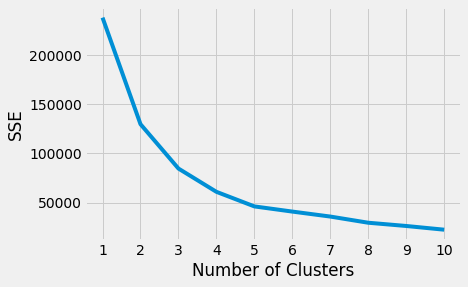

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Dari sini kita dapat melihat cluster yang tepat adalah 3 karena mulai terjal di 3. Namun kita bisa menggunakan cara lain untuk mendapatkan cluster yang paling tepat. We can use `kneed locator` library if it is difficult to decide which part of the graph is an elbow.

In [ ]:
!pip install kneed

In [ ]:
import kneed
from kneed import KneeLocator
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)
kl.elbow

3

By using `kneed locator` we finally find that the elbow is located when the `k = 3`. So that the number of clusters that we will use to build the K-means model is three clusters.

### Proses Clustering

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=100)

In [ ]:
kmeans.fit(scaled_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [ ]:
# The lowest SSE value
kmeans.inertia_

83838.66543822906

Before visualizing the cluster, I would like to find the centroid for each cluster.

In [ ]:
# Final locations of the centroid. Menampilkan pusat cluster.
kmeans.cluster_centers_

array([[ 1.64281175,  0.13661617],
       [-0.50942458, -0.89590015],
       [-0.05562904,  1.00032751]])

In [ ]:
# The number of iterations required to converge
kmeans.n_iter_

4

Finally, the cluster assignments are stored as a one-dimensional NumPy array in `kmeans.labels_`. Here’s a look at the first five predicted labels:

In [ ]:
kmeans.labels_[:5]

array([1, 1, 1, 1, 1], dtype=int32)

In [ ]:
y_kmeans = kmeans.predict(scaled_features)
y_kmeans

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

Now we can add a new column represent the cluster for each data to the previous data frame, here I will add a column named `cluster`.

In [ ]:
#Add new column to store the cluster 
pricetype['cluster'] = kmeans.labels_
pricetype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,price_cat,type_cat,cluster
0,0,6,1
1,0,6,1
2,0,6,1
3,1,6,1
4,0,6,1
...,...,...,...
119054,1,44,2
119055,1,44,2
119056,0,44,2
119057,1,44,2


### Visualisasi

Finally, let’s create the visualization. Here I create the visualization based on two first features, `price_cat` and `type_cat`.

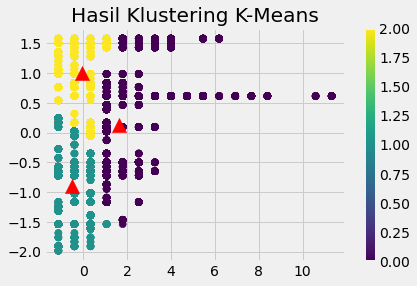

In [ ]:
output = plt.scatter(scaled_features[:,0], scaled_features[:,1], s = 50, c = pricetype.cluster, marker = 'o', alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker='^');
plt.title('Hasil Klustering K-Means')
plt.colorbar (output)
plt.show()

`Cluster 0` adalah yang berwarna ungu, `Cluster 1` yang berwarna biru langit, dan `Cluster 2` yang berwarna kuning.

## Get Insight of Cluster characteristics

In [ ]:
# Menampilkan dataset pricetype yang sudah ditambahkan kolom cluster
pricetype

,price_cat,type_cat,cluster
0,0,6,1
1,0,6,1
2,0,6,1
3,1,6,1
4,0,6,1
...,...,...,...
119054,1,44,2
119055,1,44,2
119056,0,44,2
119057,1,44,2


Memisahkan setiap cluster menjadi dataframe baru

In [ ]:
# Cluster 0. Jumlah datanya 18437
clus_0 = pricetype.groupby(["cluster"]).get_group(0)
clus_0.shape

(18437, 3)

In [ ]:
# Cluster 1. Jumlah datanya 54410
clus_1 = pricetype.groupby(["cluster"]).get_group(1)
clus_1.shape

(54410, 3)

In [ ]:
# Cluster 2. Jumlah datanya 46212
clus_2 = pricetype.groupby(["cluster"]).get_group(2)
clus_2.shape

(46212, 3)

Urutan cluster dari data terbanyak :
1. `clus_1` : 54410 row
2. `clus_2` : 46212 row
3. `clus_0` : 18437 row

`clus_1` dan `clus_2` dipilih untuk dipelajari karakteristiknya lebih lanjut (karena jumlah datanya paling banyak)

### **`clus_1`**

In [ ]:
clus_1['type_cat'].value_counts()

17    20506
6     11990
18    11351
20     3799
13     1909
11     1762
27      722
5       721
19      453
26      314
1       198
10      152
8       120
29      103
30       86
22       70
3        32
9        24
23       23
28       20
24       14
21       12
2        10
0         9
16        6
4         4
Name: type_cat, dtype: int64

Jika diperhatikan dari jumlah data transaksinya, tipe laptop yang memiliki transaksi diatas 1000 adalah 17, 6, 18, 20, 13, dan 11. Tipe tersebut adalah :

* 17 : Ideapad. Merk Lenovo
* 6  : Aspire. Merk ACER
* 18 : Inspiron. Merk DELL
* 20 : Legion. Merk Lenovo
* 13 : GF63. Merk MSI
* 11 : Envy. Merk HP

Kita akan melihat lebih detail karakteristik apa yang dimiliki `Cluster 1` ini.

In [ ]:
#seleksi kolom yang ingin digunakan
char1 = pricetype.loc[(pricetype['cluster'] == 1)].groupby(['type_cat', 'price_cat'])['cluster'].count()
char1

type_cat  price_cat
0         0               9
1         0             171
          1              21
          2               6
2         1               8
          2               2
3         0               5
          1              21
          2               6
4         0               2
          1               2
5         2             721
6         0            8695
          1            3085
          2             193
          3              17
8         2             120
9         0              24
10        0             152
11        0              15
          1             494
          2            1253
13        1             737
          2            1172
16        2               6
17        0            9782
          1            7623
          2            3101
18        0            3097
          1            4770
          2            3484
19        0             407
          1              30
          2              16
20        1              95


Dari sini kita mulai bisa melihat karakteristik lainnya yaitu `Cluster 1` mayoritas ada di kategori harga 0-2. Kategori harga tersebut adalah :
* 0 : 2199000 - 7354600
* 1 : 7354600 - 12510200
* 2 : 12510200 - 17665800

Berarti mayoritas ada direntang harga 2 jutaan sampai 17 jutaan.

In [ ]:
#mengubah series gender menjadi dataframe
kel_1 = char1.to_frame()
kel_1

In [ ]:
char1 = char1.reset_index()

In [ ]:
char1 = char1.set_index('type_cat')
char1

In [ ]:
# Ganti nama kolom cluster menjadi jlh_transaksi. Biar bener.
char1.rename(columns = {'cluster': 'jlh_transaksi'}, inplace = True)
char1

,price_cat,jlh_transaksi
type_cat,,
0,0,9
1,0,171
1,1,21
1,2,6
2,1,8
2,2,2
3,0,5
3,1,21
3,2,6


In [ ]:
piv = char1.pivot_table(index='type_cat', columns='price_cat').fillna(0)
piv.columns = [f'{col[0]} kategori_harga_{col[1]}' for col in piv.columns]
piv

,jlh_transaksi kategori_harga_0,jlh_transaksi kategori_harga_1,jlh_transaksi kategori_harga_2,jlh_transaksi kategori_harga_3
type_cat,,,,
0,9.0,0.0,0.0,0.0
1,171.0,21.0,6.0,0.0
2,0.0,8.0,2.0,0.0
3,5.0,21.0,6.0,0.0
4,2.0,2.0,0.0,0.0
5,0.0,0.0,721.0,0.0
6,8695.0,3085.0,193.0,17.0
8,0.0,0.0,120.0,0.0
9,24.0,0.0,0.0,0.0


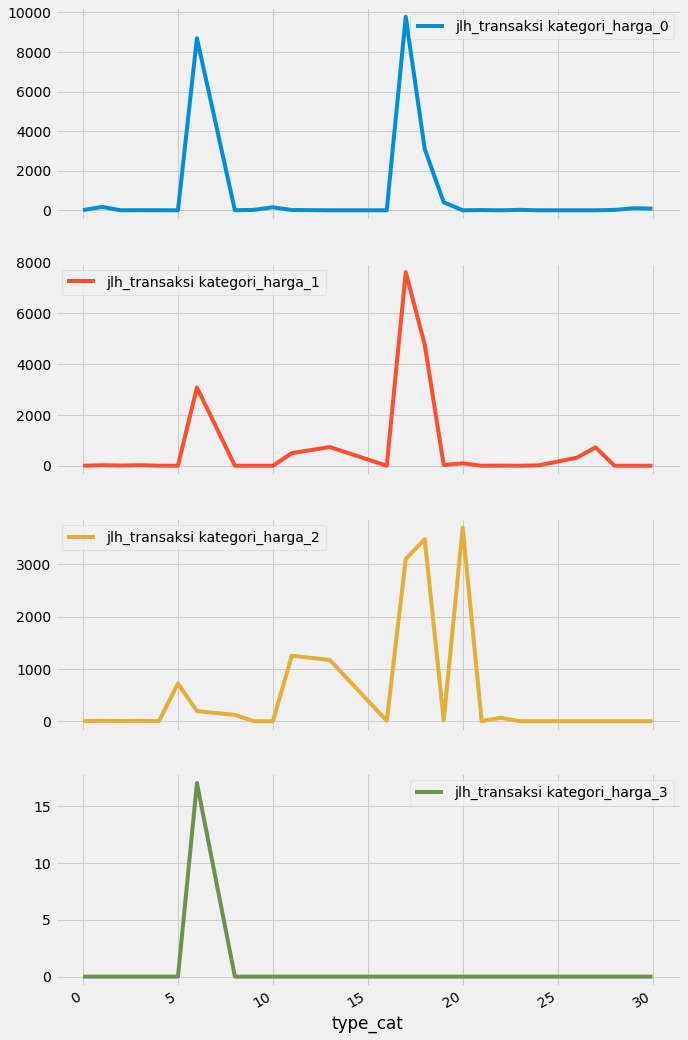

In [ ]:
#tampilkan plot tipe laptop dan jumlah transaksinya berdasarkan kategori harganya
piv.plot(subplots=True, figsize=(10, 20));

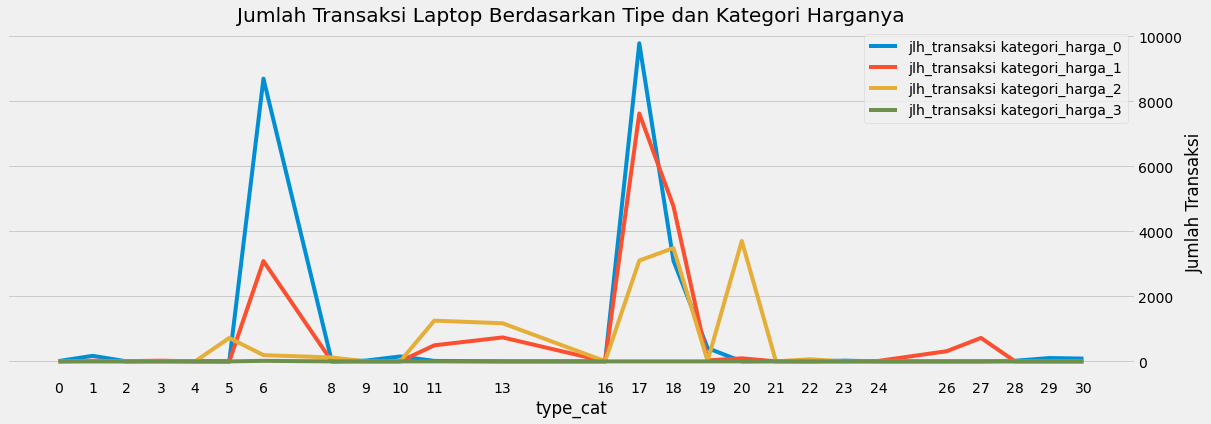

In [ ]:
piv["jlh_transaksi kategori_harga_0"].plot(secondary_y=True, figsize=(18,6))
piv["jlh_transaksi kategori_harga_1"].plot(secondary_y=True)
piv["jlh_transaksi kategori_harga_2"].plot(secondary_y=True)
piv["jlh_transaksi kategori_harga_3"].plot(secondary_y=True)

plt.title("Jumlah Transaksi Laptop Berdasarkan Tipe dan Kategori Harganya")
plt.xlabel("Tipe Laptop")
plt.ylabel("Jumlah Transaksi")

#plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48])
#plt.xticks(np.arange(min(index), max('type_cat')+1, 1.0))
plt.xticks(piv.index, rotation=90)

plt.legend(bbox_to_anchor=(1.0, 1.0))

Dari grafik dapat kita lihat bahwa tipe laptop Ideapad (17) dan Aspire (6) dengan rentang harga Rp 2.199.000 (kategori_harga_0) sampai Rp 12.510.200 (kategori_harga_1) menjadi karakteristik utama dari `Cluster 1`


### **`clus_2`**

In [ ]:
clus_2['type_cat'].value_counts()

44    11589
48     7374
38     5726
35     5066
37     4499
47     4159
29     3157
27     2694
40     1044
26      396
46      145
28      111
45       78
41       66
34       64
43       20
42       16
39        4
31        4
Name: type_cat, dtype: int64

Jika diperhatikan dari jumlah data transaksinya, tipe laptop yang memiliki transaksi diatas 1000 adalah 44, 48, 38, 35, 37, 47, 29, 27, dan 40. Tipe tersebut adalah :

* 44 : Vivobook. Merk Asus.
* 48 : Zenbook. Merk Asus
* 38 : TUF. Merk Asus
* 35 : ROG. Merk Asus
* 37 : Swift. Merk Acer
* 47 : Yoga. Merk Lenovo
* 29 : Pavilion. Merk HP
* 27 : Nitro. Merk Acer
* 40 : Thinkpad. Merk Lenovo

Kalau lebih diperhatikan lagi, jumlah transaksi 5000 keatas adalah Merk ASUS.
Kita akan melihat lebih detail karakteristik apa yang dimiliki `Cluster 2` ini.

In [ ]:
#seleksi kolom yang ingin digunakan
char2 = pricetype.loc[(pricetype['cluster'] == 2)].groupby(['type_cat', 'price_cat'])['cluster'].count()
char2

type_cat  price_cat
26        2             396
27        2            2694
28        2             111
29        1            2014
          2            1143
31        1               4
34        0              63
          2               1
35        1             295
          2            4771
37        0             773
          1            3225
          2             501
38        1            1653
          2            4073
39        2               4
40        0             830
          1             196
          2              18
41        0              61
          1               5
42        0               4
          1              12
43        0              20
44        0            3983
          1            5662
          2            1944
45        0              30
          1              40
          2               8
46        1              16
          2              42
          3              87
47        0             224
          1            1014


In [ ]:
#mengubah series gender menjadi dataframe
kel_2 = char2.to_frame()
kel_2

cluster
type_cat price_cat         
26       2              396
27       2             2694
28       2              111
29       1             2014
         2             1143
31       1                4
34       0               63
         2                1
35       1              295
         2             4771
37       0              773
         1             3225
         2              501
38       1             1653
         2             4073
39       2                4
40       0              830
         1              196
         2               18
41       0               61
         1                5
42       0                4
         1               12
43       0               20
44       0             3983
         1             5662
         2             1944
45       0               30
         1               40
         2                8
46       1               16
         2               42
         3               87
47       0              224
         1             1014
         2             1514
         3             1407
48       0               49
         1             1833
         2             3934
         3             1558

In [ ]:
char2 = char2.reset_index()

In [ ]:
char2 = char2.set_index('type_cat')
char2

,price_cat,cluster
type_cat,,
26,2,396
27,2,2694
28,2,111
29,1,2014
29,2,1143
31,1,4
34,0,63
34,2,1
35,1,295


In [ ]:
char2.rename(columns = {'cluster': 'jlh_transaksi'}, inplace = True)
char2

,price_cat,jlh_transaksi
type_cat,,
26,2,396
27,2,2694
28,2,111
29,1,2014
29,2,1143
31,1,4
34,0,63
34,2,1
35,1,295


In [ ]:
piv2 = char2.pivot_table(index='type_cat', columns='price_cat').fillna(0)
piv2.columns = [f'{col[0]} kategori_harga_{col[1]}' for col in piv2.columns]
piv2

,jlh_transaksi kategori_harga_0,jlh_transaksi kategori_harga_1,jlh_transaksi kategori_harga_2,jlh_transaksi kategori_harga_3
type_cat,,,,
26,0.0,0.0,396.0,0.0
27,0.0,0.0,2694.0,0.0
28,0.0,0.0,111.0,0.0
29,0.0,2014.0,1143.0,0.0
31,0.0,4.0,0.0,0.0
34,63.0,0.0,1.0,0.0
35,0.0,295.0,4771.0,0.0
37,773.0,3225.0,501.0,0.0
38,0.0,1653.0,4073.0,0.0


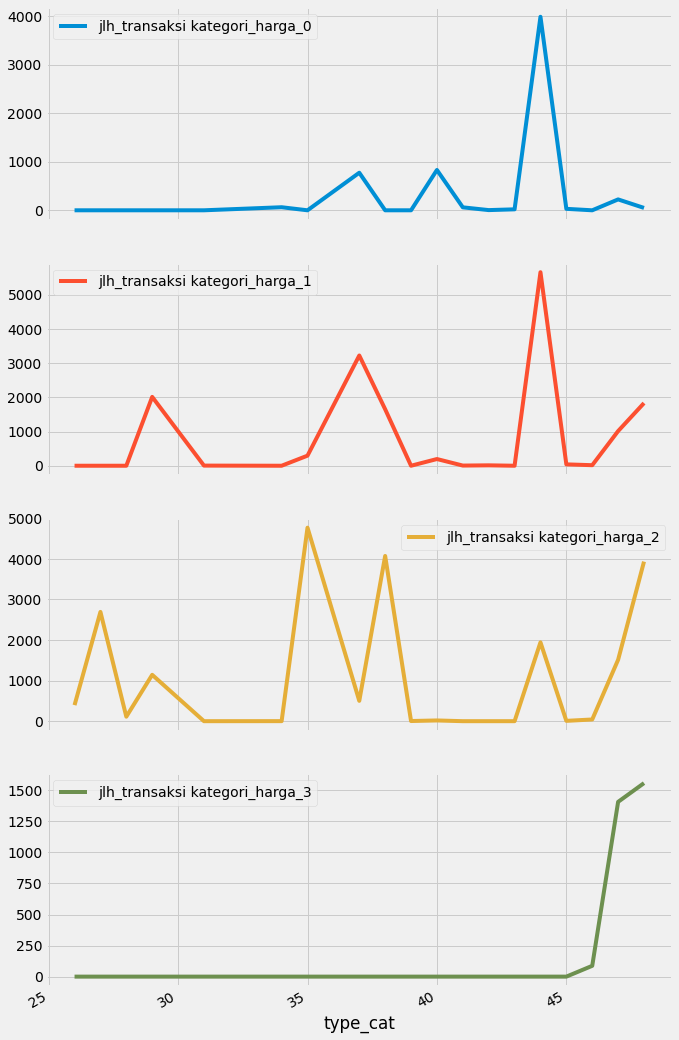

In [ ]:
#tampilkan plot tipe laptop dan jumlah transaksinya berdasarkan kategori harganya
piv2.plot(subplots=True, figsize=(10, 20));

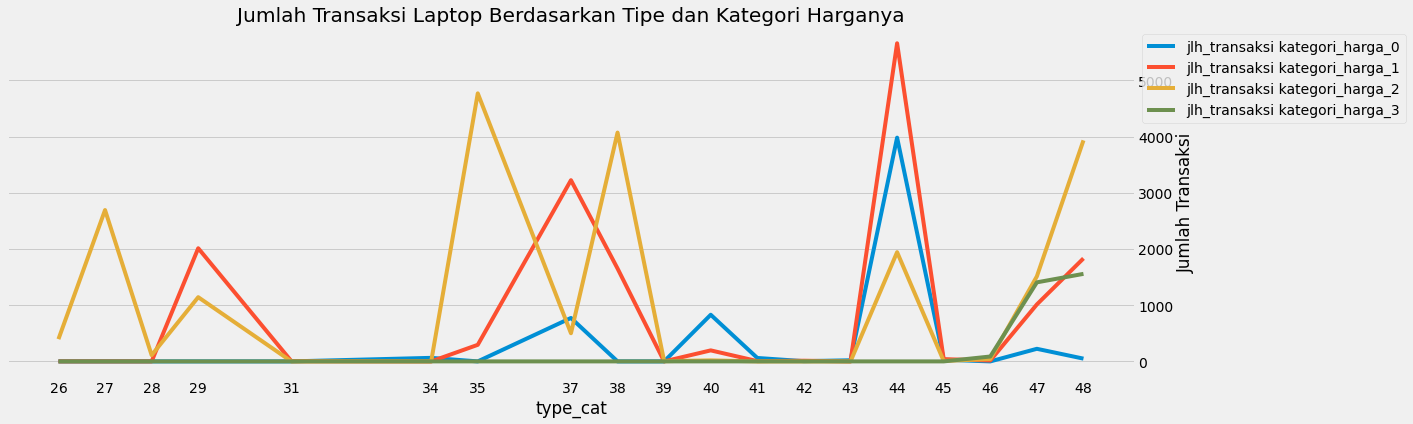

In [ ]:
piv2["jlh_transaksi kategori_harga_0"].plot(secondary_y=True, figsize=(18,6))
piv2["jlh_transaksi kategori_harga_1"].plot(secondary_y=True)
piv2["jlh_transaksi kategori_harga_2"].plot(secondary_y=True)
piv2["jlh_transaksi kategori_harga_3"].plot(secondary_y=True)

plt.title("Jumlah Transaksi Laptop Berdasarkan Tipe dan Kategori Harganya")
plt.xlabel("Tipe Laptop")
plt.ylabel("Jumlah Transaksi")

plt.xticks(piv2.index, rotation=90)

plt.legend(bbox_to_anchor=(1.0, 1.0))

Dari grafik dapat kita lihat bahwa ada dua kategori harga yang paling mencolok yaitu kategori 1 (7.354.600-12.510.200) dan 2 (12.510.200-17.665.800).

Pada kategori harga 1, ada tiga tipe yang paling mencolok, yaitu Pavilion (29), Swift (37), dan Vivobook (44).

Pada kategori harga 2, ada tiga tipe yang paling mencolok, yaitu ROG (35), TUF (38), dan Zenbook (48) yang semuanya adalah tipe dari merk ASUS.

Secara keseluruhan, tipe-tipe laptop dari merk ASUS dengan rentang harga Rp 12.510.200 - Rp 17.665.800 `(kategori_harga_2)` menjadi karakteristik utama dari `Cluster 2`.

Hal ini berbeda sekali dengan `Cluster 1` yang memiliki karakteristik yang paling mencolok dari tipe laptop Ideapad (Lenovo) dan Aspire (Acer) dengan rentang harga Rp 2.199.000 `(kategori_harga_0)` sampai Rp 12.510.200 `(kategori_harga_1)`.